# import necessary libraries


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# load the dataset


In [11]:
df=pd.read_csv('netflix_content_2023.csv')
print(df.columns.to_list())
df.head()

['Title', 'Available Globally?', 'Release Date', 'Hours Viewed', 'Language Indicator', 'Content Type']


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [12]:
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


In [13]:
# get summary of the data
print(df.describe())

       Hours Viewed
count  2.481200e+04
mean   6.384084e+06
std    2.067086e+07
min    1.000000e+05
25%    3.000000e+05
50%    1.100000e+06
75%    4.700000e+06
max    8.121000e+08


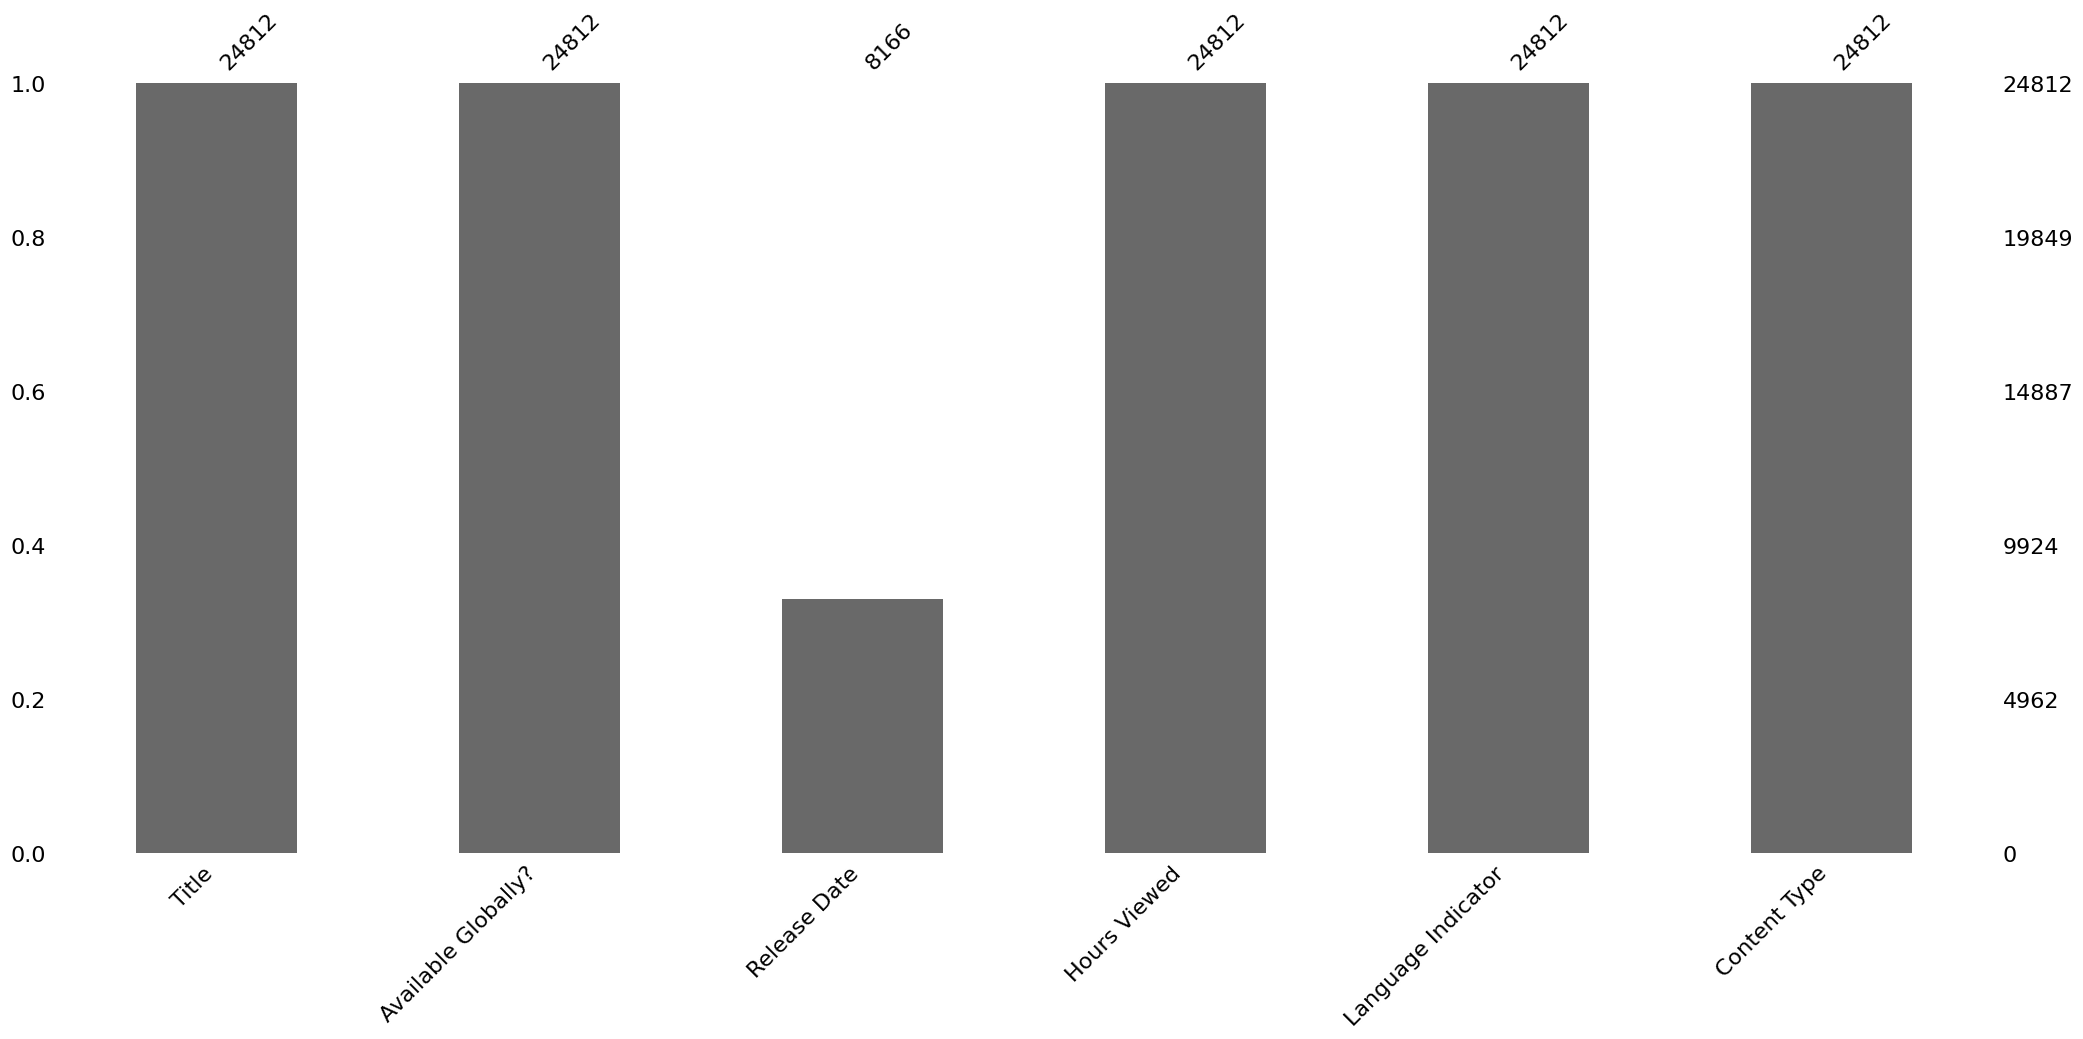

In [14]:
import missingno as msno
msno.bar(df)
plt.show()


In [15]:
# count number of duplicates in title
print(df['Title'].duplicated().sum())

5654


In [16]:
# Fill missing release dates by propagating values within the same title
df['Release Date'] = df.groupby('Title')['Release Date'].transform(lambda x: x.ffill().bfill())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15772\1640879253.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Release Date'] = df.groupby('Title')['Release Date'].transform(lambda x: x.ffill().bfill())


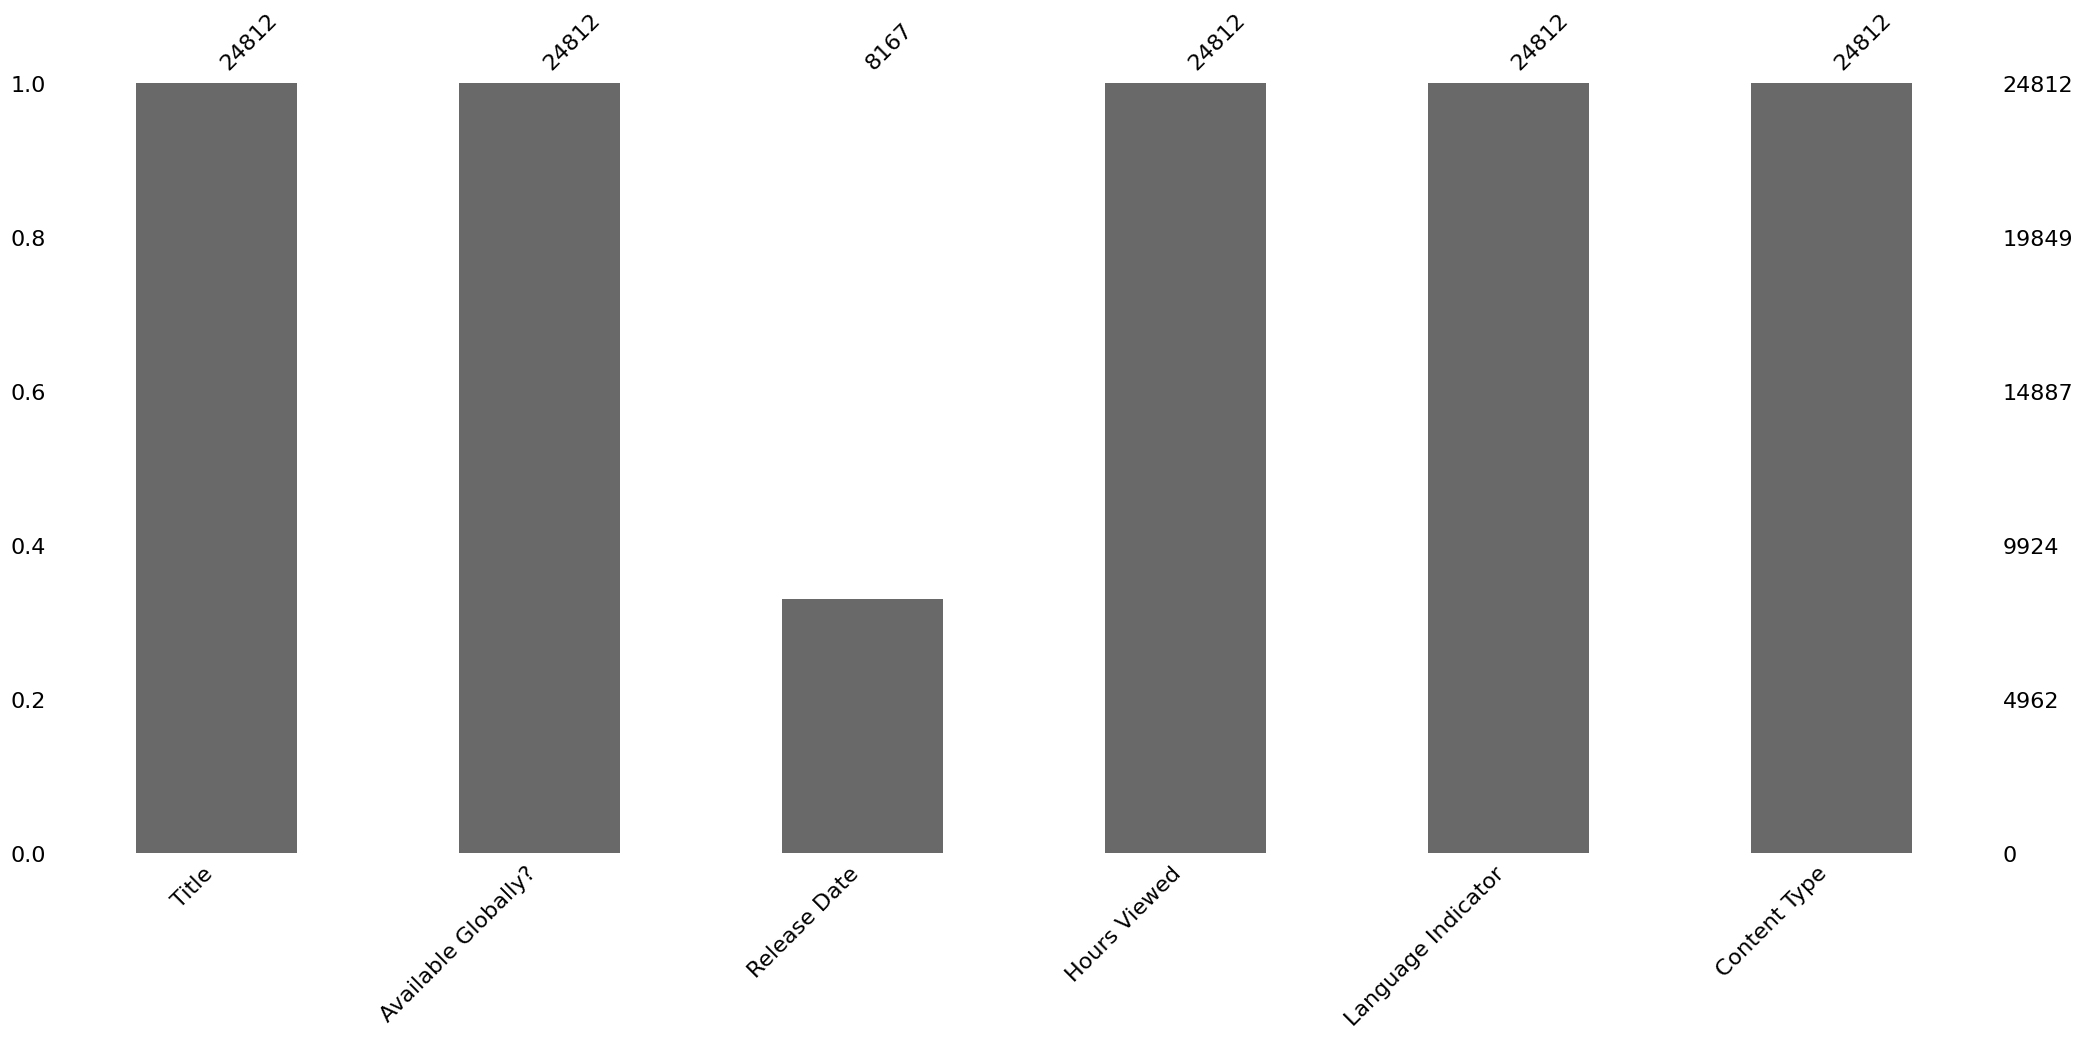

In [17]:
import missingno as msno
msno.bar(df)
plt.show()

# content wise analysis


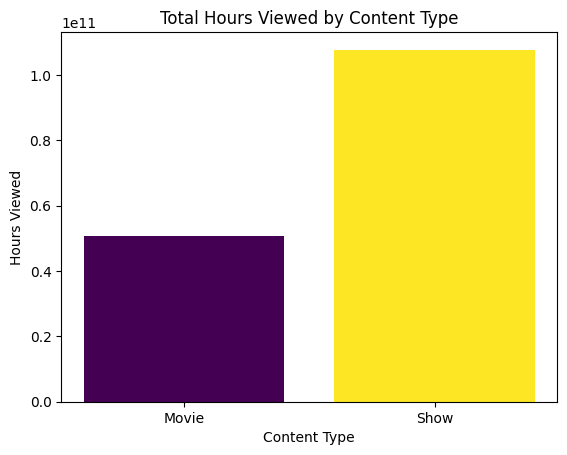

In [18]:
content_type_viewership = df.groupby('Content Type')['Hours Viewed'].sum()
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Content Type'].unique())))
plt.bar(content_type_viewership.index, content_type_viewership.values, color=colors)
plt.title('Total Hours Viewed by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Hours Viewed')
plt.savefig('result/total_hours_viewed_by_content_type.png')
plt.show()

# Language Viwership


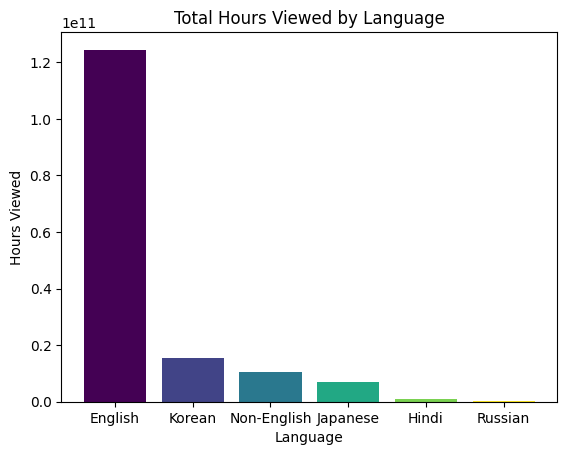

In [19]:
language_viewership = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Language Indicator'].unique())))
plt.bar(language_viewership.index, language_viewership.values, color=colors)
plt.title('Total Hours Viewed by Language')
plt.xlabel('Language')
plt.ylabel('Hours Viewed')
plt.savefig('result/total_hours_viewed_by_language.png')
plt.show()

# Viewership by release month


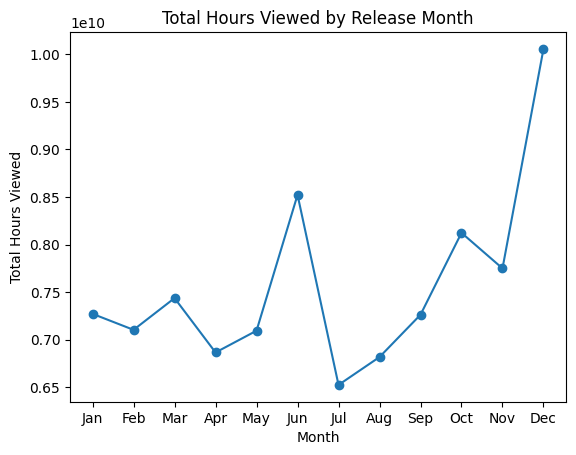

In [20]:
# convert the "Release Date" to a datetime format and extract the month
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Month'] = df['Release Date'].dt.month

# aggregate viewership hours by release month
monthly_viewership = df.groupby('Release Month')['Hours Viewed'].sum()
# month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# plot the monthly viewership
plt.plot(months, monthly_viewership, marker='o')
plt.title('Total Hours Viewed by Release Month')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed')
plt.savefig('result/total_hours_viewed_by_release_month.png')
plt.show()

# Top 5 most watched Shows


In [21]:
top_5_shows = df[df['Content Type'] == 'Show'].nlargest(5, 'Hours Viewed')
print(top_5_shows[['Title', 'Hours Viewed']].to_string(index=False))
# save the top 5 shows to a csv file
top_5_shows.to_csv('result/top_5_shows.csv', index=False)

                             Title  Hours Viewed
         The Night Agent: Season 1   812100000.0
         Ginny & Georgia: Season 2   665100000.0
The Glory: Season 1 // 더 글로리: 시즌 1   622800000.0
               ONE PIECE: Season 1   541900000.0
               Wednesday: Season 1   507700000.0


- The most-watched movie was King the Land: Limited Series with 630.2 million hours viewed.
- Most top movies were globally available.
- The dominant language for top movies was English, except for King the Land (Korean).


# Top 5 Movies


In [22]:
top_5_movie = df[df['Content Type'] == 'Movie'].nlargest(5, 'Hours Viewed')
print(top_5_movie[['Title', 'Hours Viewed']].to_string(index=False))
top_5_movie.to_csv('result/top_5_movies.csv', index=False)

                                               Title  Hours Viewed
     King the Land: Limited Series // 킹더랜드: 리미티드 시리즈   630200000.0
                 Queen Charlotte: A Bridgerton Story   503000000.0
                 Who is Erin Carter?: Limited Series   286200000.0
                                       Lupin: Part 3   274300000.0
Dear Child: Limited Series // Liebes Kind: Miniserie   252800000.0


- The most-watched show was The Night Agent: Season 1 with 812.1 million hours viewed.
- English-language shows dominated the top 5.


# Content Wise Monthly Viewership


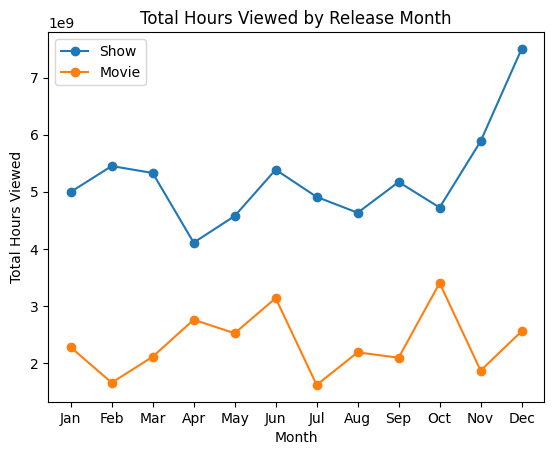

In [23]:
content_wise_monthly_viewership = df.groupby(['Content Type', 'Release Month'])['Hours Viewed'].sum()
plt.plot(months, content_wise_monthly_viewership.loc['Show'], marker='o', label='Show')
plt.plot(months, content_wise_monthly_viewership.loc['Movie'], marker='o', label='Movie')
plt.title('Total Hours Viewed by Release Month')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed')
plt.legend()
plt.savefig('result/total_hours_viewed_by_release_month_content_type.png')
plt.show()

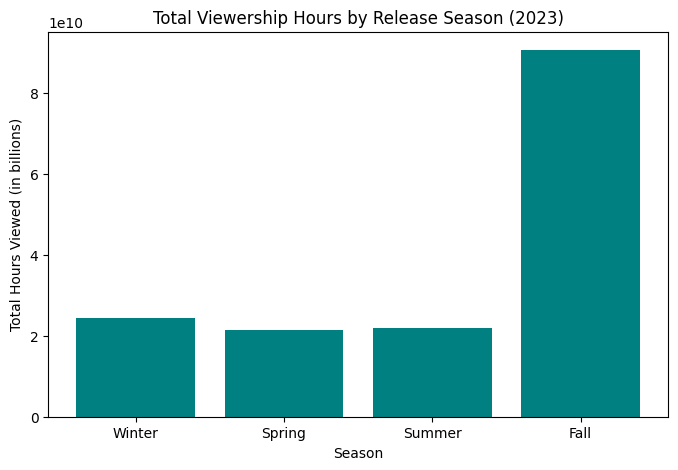

In [24]:
# Define seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the season categorization to the dataset
df['Release Season'] = df['Release Month'].apply(get_season)

# Aggregate viewership hours by release season
seasonal_viewership = df.groupby('Release Season')['Hours Viewed'].sum()

# Order the seasons as 'Winter', 'Spring', 'Summer', 'Fall'
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(seasonal_viewership.index, seasonal_viewership.values, color='teal')

# Labels and Titles
plt.title('Total Viewership Hours by Release Season (2023)')
plt.xlabel('Season')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xticks(rotation=0)
plt.savefig('result/total_hours_viewed_by_release_season.png')
# Show the plot
plt.show()

- got the most viewership in Fall season


# Global Availbility vs Viewership


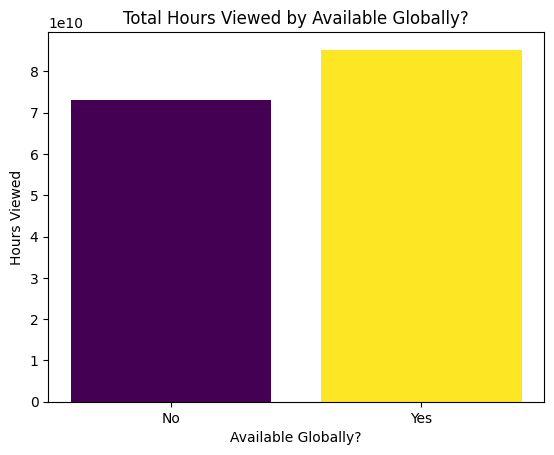

In [25]:
# affect of Available Globally? on viewership
global_viewership = df.groupby('Available Globally?')['Hours Viewed'].sum()
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Available Globally?'].unique())))
plt.bar(global_viewership.index, global_viewership.values, color=colors)
plt.title('Total Hours Viewed by Available Globally?')
plt.xlabel('Available Globally?')
plt.ylabel('Hours Viewed')
plt.savefig('result/total_hours_viewed_by_available_globally.png')
plt.show()

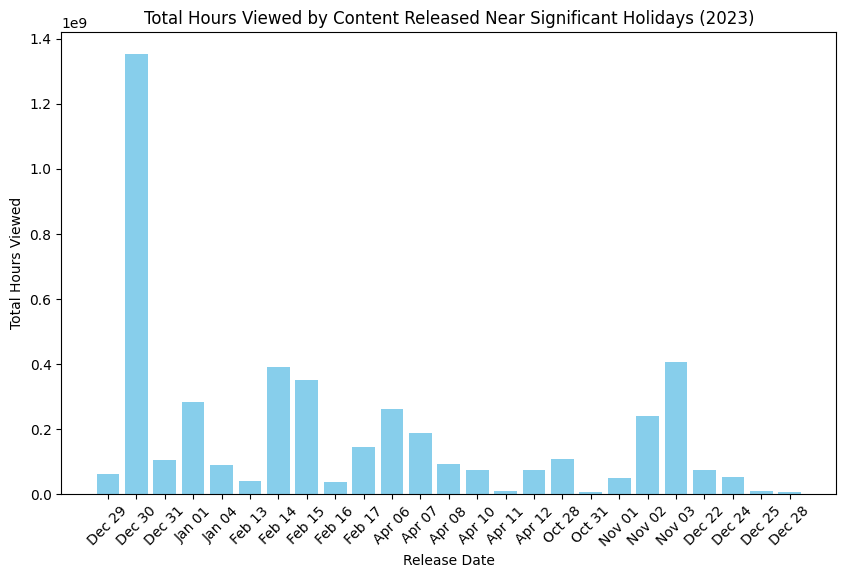

In [26]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's day
    '2023-10-31',  # halloween
    '2023-12-25',  # christmas day
    '2023-04-09'   # easters day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = df[df['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

# plot viewership by holidays bar graph
plt.figure(figsize=(10, 6))
plt.bar(holiday_viewership.index.strftime('%b %d'), holiday_viewership.values, color='skyblue')
plt.title('Total Hours Viewed by Content Released Near Significant Holidays (2023)')
plt.xlabel('Release Date')
plt.ylabel('Total Hours Viewed')
plt.xticks(rotation=45)
plt.savefig('result/total_hours_viewed_by_release_date_near_holidays.png')
plt.show()



- New Year’s Eve recorded the highest viewership, indicating a strong preference for entertainment during major holidays.
